In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
import sys
print(sys.version)

2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]


In [3]:
import warnings; warnings.simplefilter('ignore')

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

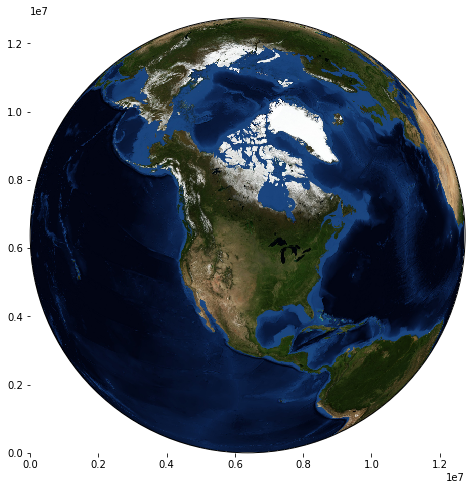

In [4]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

In [5]:
import pandas as pd
wf_tweet_cord = pd.read_csv('wildfire_sentiment_analysis_working.csv')

In [6]:
wf_tweet_cord.head()

,id,user_location,Lat,Long
0,1,"ÜT: 19.751064,-155.535777",19.751064,-155.535777
1,6,"Alaska, USA",58.299730,-134.406790
2,9,"Mountain View, CA",37.389670,-122.081610
3,10,Harlan County Kentucky,36.842810,-83.280300
4,12,San Francisco,37.777130,-122.419640


In [7]:
lat = wf_tweet_cord['Lat'].values
lon = wf_tweet_cord['Long'].values

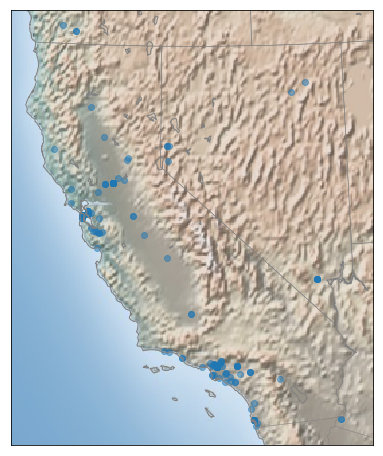

In [8]:
# draw the map background
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119,\
           width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, cmap='Reds', alpha=0.5)
#plt.colorbar(label=r'No of tweets')
plt.clim(7, 3)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], alpha=0.5)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

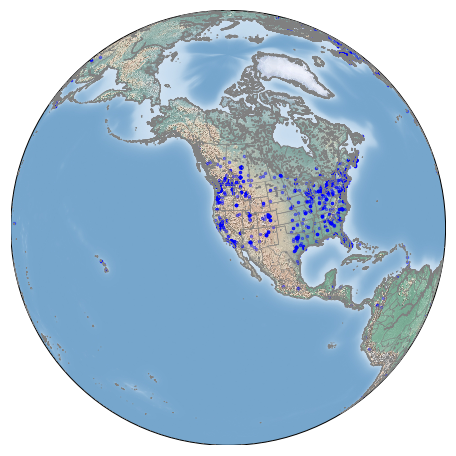

In [12]:
# draw the map background
fig = plt.figure(figsize=(12,8))
# orthogonal projection
m = Basemap(projection='ortho', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.4, s=6, color='b')

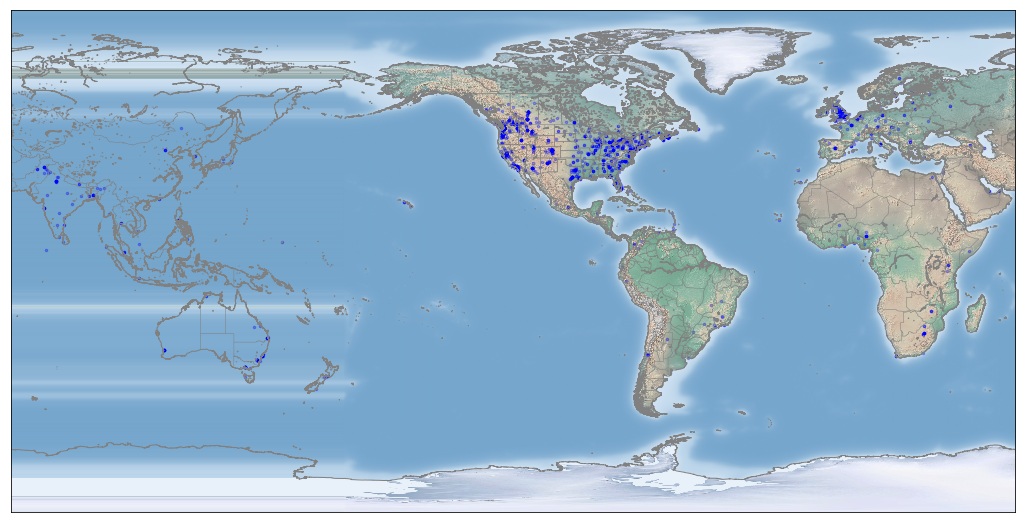

In [15]:
# draw the map background
fig = plt.figure(figsize=(18,15))
# The simplest projection, just displays the world in latitude/longitude coordinates
m = Basemap(projection='cyl', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief(scale=0.5)
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.3, marker='o', color='b', s=6)
#plt.colorbar(label=r'No of tweets')
plt.clim(3, 17)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


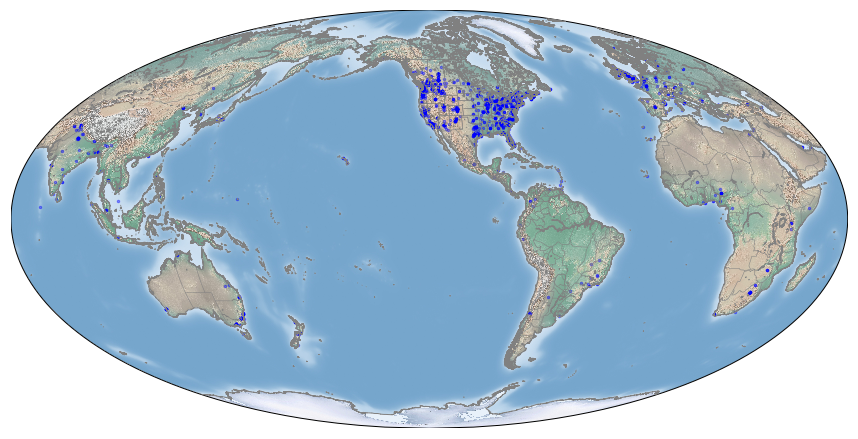

In [16]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The mollweide projection is a global, elliptical, equal-area projection
m = Basemap(projection='moll', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.4, color='b', s=6)
#plt.colorbar(label=r'No of tweets')
plt.clim(3, 17)

In [ ]:
m = Basemap(llcrnrlon=-135, llcrnrlat=23, urcrnrlon=-50, urcrnrlat=52, projection='cass', resolution='i')

In [ ]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The transverse aspect of the equidistant cassindrical projection. The globe is first rotated so the \
# central meridian becomes the “equator”, and then the normal equidistant cylindrical projection is applied
m = Basemap(projection='cass', resolution='h', lat_0=40, lon_0=-100,\
           llcrnrlon=-135,llcrnrlat=23,urcrnrlon=-50,urcrnrlat=52)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# draw parallels (latitude)
parallels = np.arange(0.,90.,10.)
m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10)

# draw meridians (longitude)
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians=meridians, labels=[0,0,0,1], fontsize=10)

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.4, color='b', s=6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 5, [-102.74616639578684, 31.420050782234483, 0.0, 0.0], [-100.39704337951974, 34.87992201729806, 0.0, 0.0], <matplotlib.collections.LineCollection object at 0x000000C501F15A90>)


AttributeError: type object 'map' has no attribute 'miles_buffer6'

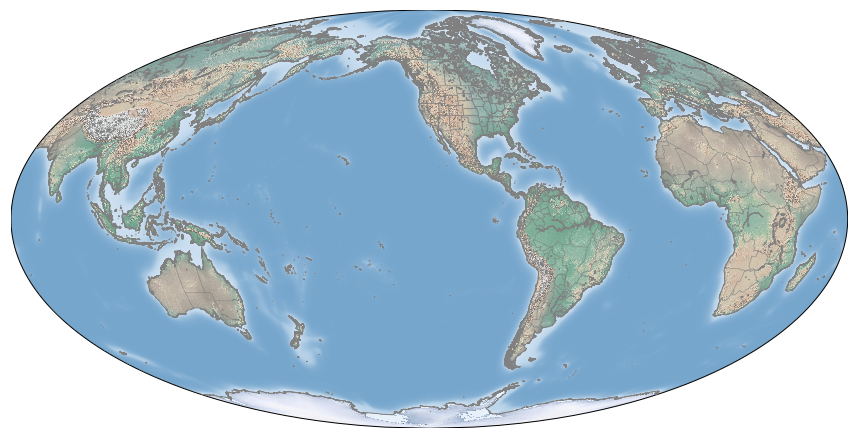

In [14]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The mollweide projection is a global, elliptical, equal-area projection
m = Basemap(projection='moll', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

shp_info = m.readshapefile('shapefiles/miles_buffer6','miles_buffer6')
print(shp_info)
for info, miles_buffer in zip(map.miles_buffer6.GetInfo, map.miles_buffer6):
    m.plot(miles_buffer[0], miles_buffer[1], marker='+', color='m', markersize=8, markeredgewidth=2)
plt.show()

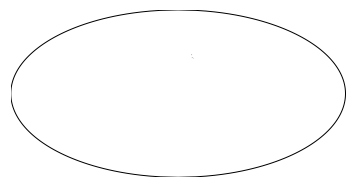

In [59]:
shp_info = m.readshapefile('shapefiles/miles_buffer6','miles_buffer6')

In [2]:
import geopandas as gp

ModuleNotFoundError: No module named 'geopandas'

In [68]:
all_loc = gp.GeoDataFrame.from_file('shapefiles/All_Locations.shp')

In [126]:
miles6 = gp.GeoDataFrame.from_file('shapefiles/miles_buffer6.shp')

In [130]:
miles6.shape

(5, 12)

In [131]:
miles6.crs

{'init': u'epsg:4326'}

In [137]:
from shapely.geometry import Point
for index, row in miles6.iterrows():
    for pt in list(row['geometry'].exterior.coords):
        print Point(pt)

POINT (-100.4478411 31.50712972099926)
POINT (-100.4457814246729 31.5070939333918)
POINT (-100.4437251380863 31.50698662944889)
POINT (-100.441675623382 31.50680798571167)
POINT (-100.439636252514 31.50655829609135)
POINT (-100.4376103806779 31.50623797138363)
POINT (-100.4356013407686 31.50584753859013)
POINT (-100.4336124378757 31.50538764004782)
POINT (-100.4316469438249 31.50485903236803)
POINT (-100.429708091776 31.50426258518677)
POINT (-100.4277990708853 31.50359927972844)
POINT (-100.4259230210418 31.50287020718531)
POINT (-100.4240830276865 31.50207656691567)
POINT (-100.4222821167224 31.50121966446337)
POINT (-100.4205232495246 31.50030090940231)
POINT (-100.4188093180587 31.4993218130095)
POINT (-100.4171431401148 31.49828398577028)
POINT (-100.4155274546662 31.49718913472035)
POINT (-100.4139649173599 31.4960390606286)
POINT (-100.4124580961463 31.49483565502581)
POINT (-100.4110094670551 31.49358089708388)
POINT (-100.4096214101258 31.49227685035108)
POINT (-100.4082962054

POINT (-102.3269139698737 34.83771331280619)
POINT (-102.326893413608 34.83594934510512)
POINT (-102.3269595734019 34.83418613911523)
POINT (-102.327112335021 34.8324265916383)
POINT (-102.3273514419913 34.83067359328341)
POINT (-102.3276764960564 34.8289300237199)
POINT (-102.3280869578674 34.82719874694929)
POINT (-102.3285821479039 34.82548260660431)
POINT (-102.3291612476239 34.82378442128243)
POINT (-102.3298233008412 34.82210697992161)
POINT (-102.3305672153274 34.82045303722578)
POINT (-102.3313917646355 34.81882530914767)
POINT (-102.332295590143 34.81722646843615)
POINT (-102.3332772033091 34.81565914025551)
POINT (-102.3343349881436 34.81412589788361)
POINT (-102.3354672038834 34.81262925849608)
POINT (-102.3366719878705 34.81117167904342)
POINT (-102.3379473586286 34.80975555222742)
POINT (-102.3392912191316 34.80838320258377)
POINT (-102.3407013602596 34.80705688267705)
POINT (-102.3421754644356 34.80577876941416)
POINT (-102.3437111094384 34.8045509604824)
POINT (-102.3453

In [128]:
miles6.head()

,NAME,CITY,POSTALCODE,State,country,EVENTID,LATITUDE,LONGITUDE,Aggregate,BUFF_DIST,ORIG_FID,geometry
0,"SAN ANGELO, TX 76901, US",SAN ANGELO,76901,Texas,United States,1073742151,31.463586,-100.447841,"36,596,681",3.0,0,"POLYGON ((-100.4478411 31.50712972099926, -100..."
1,"ODESSA, TX 79761, US",ODESSA,79761,Texas,United States,1073742152,31.863110,-102.362329,"30,115,297",3.0,1,"POLYGON ((-102.3623286 31.90665141056233, -102..."
2,"MIDLAND, TX 79701, US",MIDLAND,79701,Texas,United States,1073742153,31.996517,-102.099104,"20,466,760",3.0,2,"POLYGON ((-102.0991036 32.04005757462282, -102..."
3,"HEREFORD, TX 79045, US",HEREFORD,79045,Texas,United States,1073742154,34.836402,-102.379673,"10,935,330",3.0,3,"POLYGON ((-102.3796735 34.87992201729806, -102..."
4,"FRIONA, TX 79035, US",FRIONA,79035,Texas,United States,1073742155,34.622029,-102.693522,"9,821,180",3.0,4,"POLYGON ((-102.6935224 34.66555080220901, -102..."


In [112]:
x = miles6.geometry[0]

In [114]:
print x[0]

TypeError: 'Point' object does not support indexing

In [134]:
import seaborn as sns
sns.set(rc={'image.cmap': 'cubehelix'})
sns.set_context('poster')

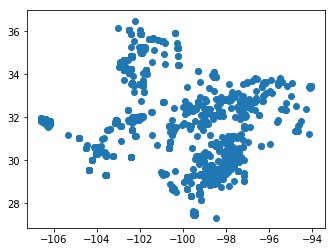

In [73]:
miles6.plot()

In [72]:
import shapely

In [84]:
import matplotlib as mpl

In [132]:
miles6.geometry[:5]

0    POLYGON ((-100.4478411 31.50712972099926, -100...
1    POLYGON ((-102.3623286 31.90665141056233, -102...
2    POLYGON ((-102.0991036 32.04005757462282, -102...
3    POLYGON ((-102.3796735 34.87992201729806, -102...
4    POLYGON ((-102.6935224 34.66555080220901, -102...
Name: geometry, dtype: object

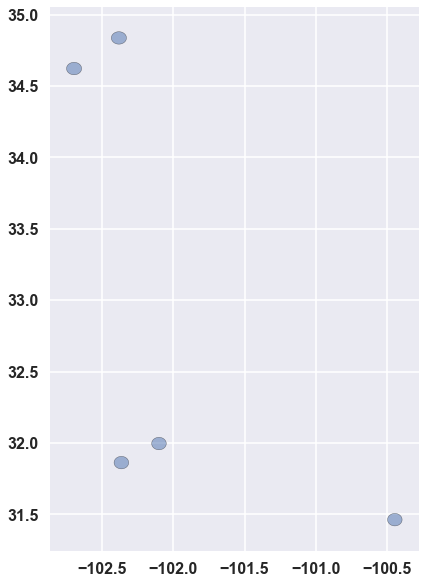

In [141]:
ax = miles6.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [142]:
ax.axis()

(-102.86362254660018,
 -100.27958722870638,
 31.24705722048131,
 35.05291557905124)

In [140]:
miles6.geometry.total_bounds

array([-102.7461664 ,   31.42005078, -100.39704338,   34.87992202])

In [143]:
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat = miles6.geometry.total_bounds

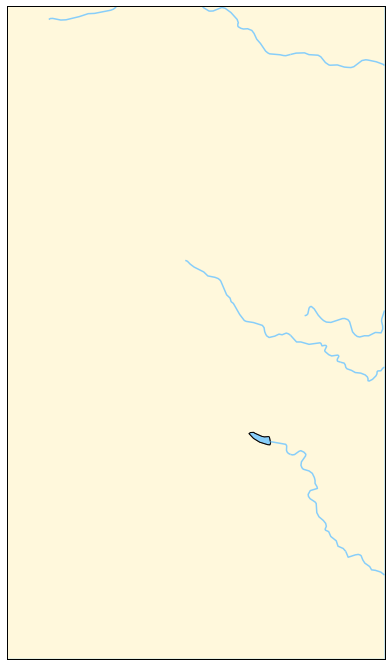

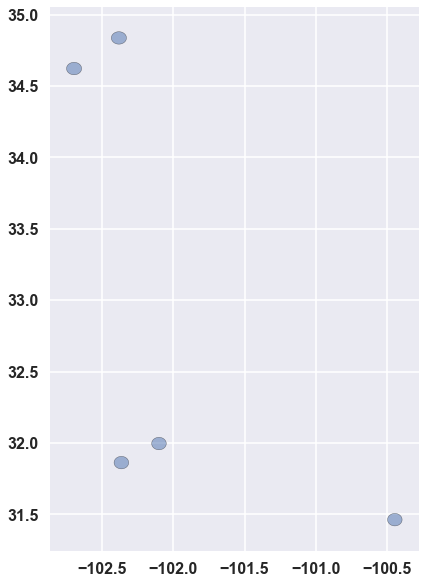

In [149]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The transverse aspect of the equidistant cassindrical projection. The globe is first rotated so the \
# central meridian becomes the “equator”, and then the normal equidistant cylindrical projection is applied
m = Basemap(projection='aea', resolution='h', lat_0=33, lon_0=-101, ellps='WGS84',\
           llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,\
           width=600000, height=400000)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
coast = m.drawcoastlines()
rivers = m.drawrivers(color=water, linewidth=1.5)
continents = m.fillcontinents(        
    color=earth,
    lake_color=water)
bound= m.drawmapboundary(fill_color=water)
countries = m.drawcountries()
fig = miles6.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [106]:
sample_pts = zip([-101.929167,-102.388633], [34.986743,34.834206])

In [118]:
sample_pts

[(-101.929167, 34.986743), (-102.388633, 34.834206)]

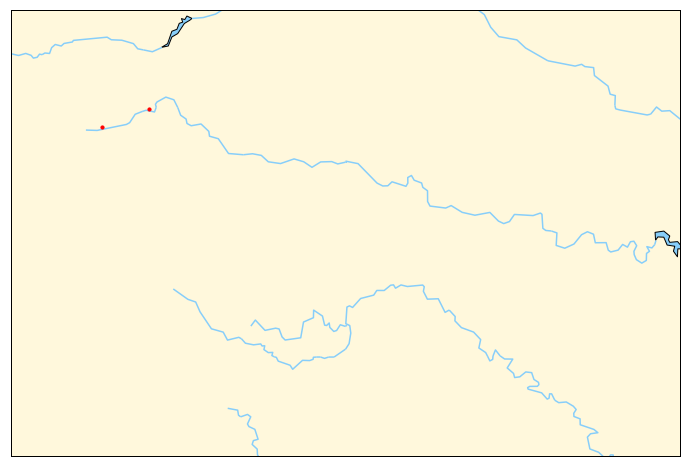

In [110]:
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000, 
    resolution='i', 
    projection='aea',
    ellps='WGS84',
    lat_1=32., lat_2=40., 
    lat_0=34., lon_0=-100)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(        
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
#merid = mm.drawmeridians(np.arange(-180, 180, 2), labels=[False, False, False, True])
#parall = mm.drawparallels(np.arange(0, 80), labels=[True, True, False, False]

for i in range(0, len(sample_pts)):
    x, y = mm(sample_pts[i][0], sample_pts[i][1])
    sample_scatter = mm.scatter(x, y, 10, color='red', zorder=10)

In [104]:
sample_lon, sample_lat = -101.929167, 34.986743

In [85]:
water = 'lightskyblue'
earth = 'cornsilk'
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : 20}
mpl.rc('font', **font)